## Stock prices prediction
The other objective of this project is to predict the future 25 day closing prices of tech companies by the daily opening, highest, lowest prices and volume. I would be predicting the relationship using a linear regression model and evaluate the performance of the model in predicting closing prices.

The first step is to import required packages

In [2]:
## IMPORT PACKAGES ##
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Then, I import the data generated from Tiingo daily reader in the stock-analysis.ipynb jupyter notebook.

In [3]:
df = pd.read_csv("tech-stock-data.csv")

## Part 1: META

To predict closing prices of Meta, I first prepare a separate data frame for Meta data by extracting the relevant Meta  data (`close`,`high`, `low`, `open`, `avolume`). Following that, I added a new `target` column to include the closing prices of stocks after 25 days. Lastly, I dropped the last 25 rows, as they have null values in the `target` column.

In [37]:
meta = df.loc[df['symbol'] == "META"]

meta_df = meta[['close','high','low','open','volume']]

meta_df['target'] = meta_df['close'].shift(-25)

meta_df.dropna(axis=0,inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11206/1632805575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['target'] = meta_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11206/1632805575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df.dropna(axis=0,inplace=True)


After preparing a data frame for Meta, I splitted the data frame into 80% of train data and 20% of test data to build a linear regression model.

In [38]:
meta_x = meta_df.drop('target', axis=1).copy()
meta_y = meta_df['target'].copy()

meta_x_train, meta_x_test, meta_y_train, meta_y_test  = train_test_split(meta_x, meta_y, test_size = 0.2)

I then inspect the number of rows and columns of the train and test data sets.

In [39]:
print("The shape of the training and testing data sets are as follows:\nmeta_x_train: {}\nmeta_x_test: {}\nmeta_y_train: {}\nmeta_y_test: {} \n".format(meta_x_train.shape, meta_x_test.shape, meta_y_train.shape, meta_y_test.shape))

print("There are {} rows and {} columns in the META training data set.\nThere are {} rows and {} columns in the META testing data set.".format(meta_y_train.shape[0], meta_x_train.shape[1], meta_y_test.shape[0], meta_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
meta_x_train: (433, 5)
meta_x_test: (109, 5)
meta_y_train: (433,)
meta_y_test: (109,) 

There are 433 rows and 5 columns in the Meta training data set.
There are 109 rows and 5 columns in the Meta testing data set.


I build a linear regression model to predict closing prices with daily opening, highest, lowest prices and volume. Training data was used to build the model, then testing data was used to predict the future closing prices based on the model. Lastly, I evaluated the model performance based on R squared.

In [40]:
# building a model
regression = LinearRegression()
regression.fit(meta_x_train, meta_y_train)

# predicting future closing prices based on the model
meta_model_prediction = regression.predict(meta_x_test)
meta_model_r2 = abs(regression.score(meta_x_test,meta_y_test)*100)
print('The r2 of the linear regression model is: ', meta_model_r2.round(2), '%')


The r2 of the linear regression model is:  61.44 %


I then visualise the predictions versus actual closing prices.

Text(0.5, 1.0, 'Predicting Meta closing prices with linear regression')

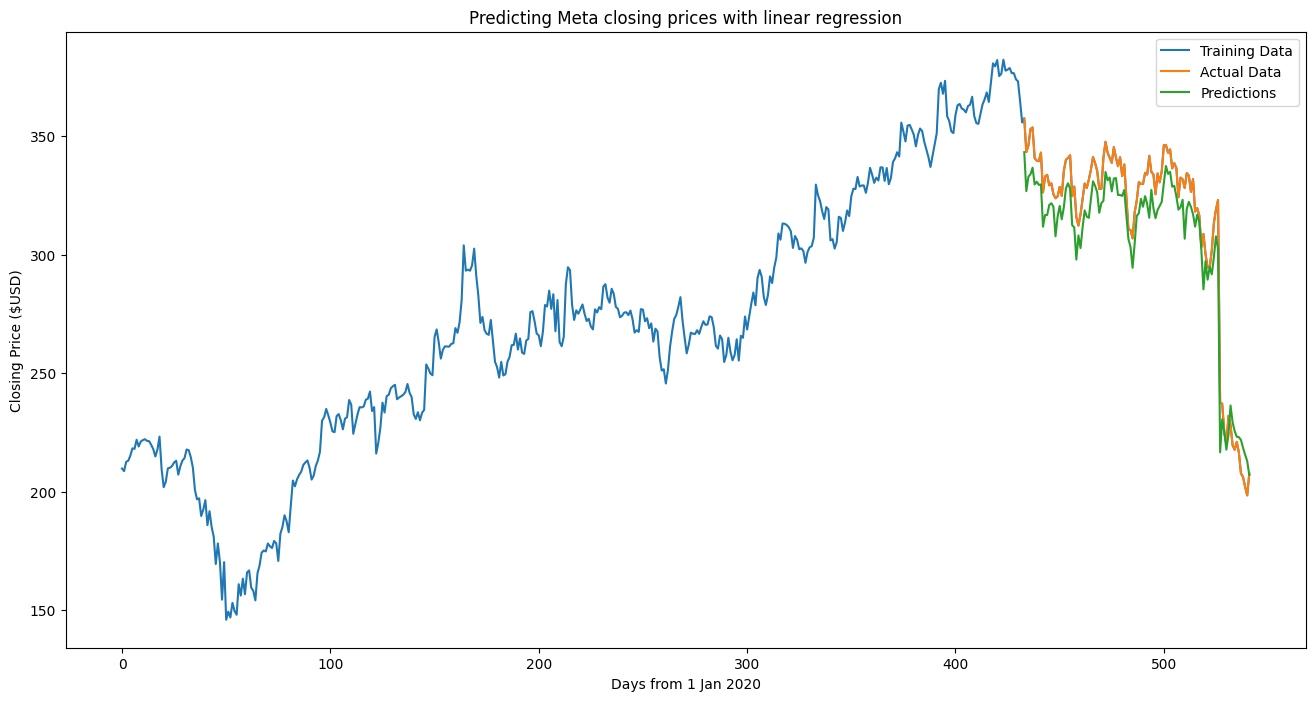

In [41]:
meta_model_plot = meta_df[433:].copy()
meta_model_plot['predict'] = regression.predict(meta_model_plot.drop(columns = 'target'))

plt.figure(figsize=[16,8])
plt.plot(meta_df['close'])
plt.plot(meta_model_plot[['close', 'predict']])
plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting Meta closing prices with linear regression')

To conclude, linear regression was used to predict Meta future 25 day closing prices according to its daily opening, highest, lowest prices and volume. The predicters accounts for 84.14% of the variance in Meta's closing prices, which suggests that the linear regression model significantly predicts the closing prices.

## Part 2: AAPL

In [113]:
# preparing the AAPL data set
aapl = df.loc[df['symbol'] == "AAPL"]

aapl_df = aapl[['close','high','low','open','volume']]

aapl_df['target'] = aapl_df['close'].shift(-25)

aapl_df.dropna(axis=0,inplace=True)

aapl_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11206/3647388643.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df['target'] = aapl_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11206/3647388643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_df.dropna(axis=0,inplace=True)


In [121]:
# defining the predictor (x) and outcome (y) variables
aapl_x = aapl_df.drop('target', axis=1).copy()
aapl_y = aapl_df['target'].copy()

# splitting the AAPL dataset into training and testing data sets
aapl_x_train, aapl_x_test, aapl_y_train, aapl_y_test  = train_test_split(aapl_x, aapl_y, test_size = 0.2)

# inspecting the number of rows and columns of the AAPL training and testing data sets
print("The shape of the training and testing data sets are as follows:\naapl_x_train: {}\naapl_x_test: {}\naapl_y_train: {}\naapl_y_test: {} \n".format(aapl_x_train.shape, aapl_x_test.shape, aapl_y_train.shape, aapl_y_test.shape))

print("There are {} rows and {} columns in the AAPL training data set.\nThere are {} rows and {} columns in the AAPL testing data set.".format(aapl_y_train.shape[0], aapl_x_train.shape[1], aapl_y_test.shape[0], aapl_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
aapl_x_train: (433, 6)
aapl_x_test: (109, 6)
aapl_y_train: (433,)
aapl_y_test: (109,) 

There are 433 rows and 6 columns in the AAPL training data set.
There are 109 rows and 6 columns in the AAPL testing data set.


In [116]:
# building the AAPL linear regression model
aapl_model = LinearRegression()
aapl_model.fit(aapl_x_train, aapl_y_train)

# predicting future AAPL closing prices based on the model
aapl_model_prediction = aapl_model.predict(aapl_x_test)
aapl_model_r2 = abs(aapl_model.score(aapl_x_test,aapl_y_test)*100)
print('The r2 of the linear regression model is: ', aapl_model_r2.round(2), '%')


The r2 of the linear regression model is:  63.59 %


Text(0.5, 1.0, 'Predicting AAPL closing prices with linear regression')

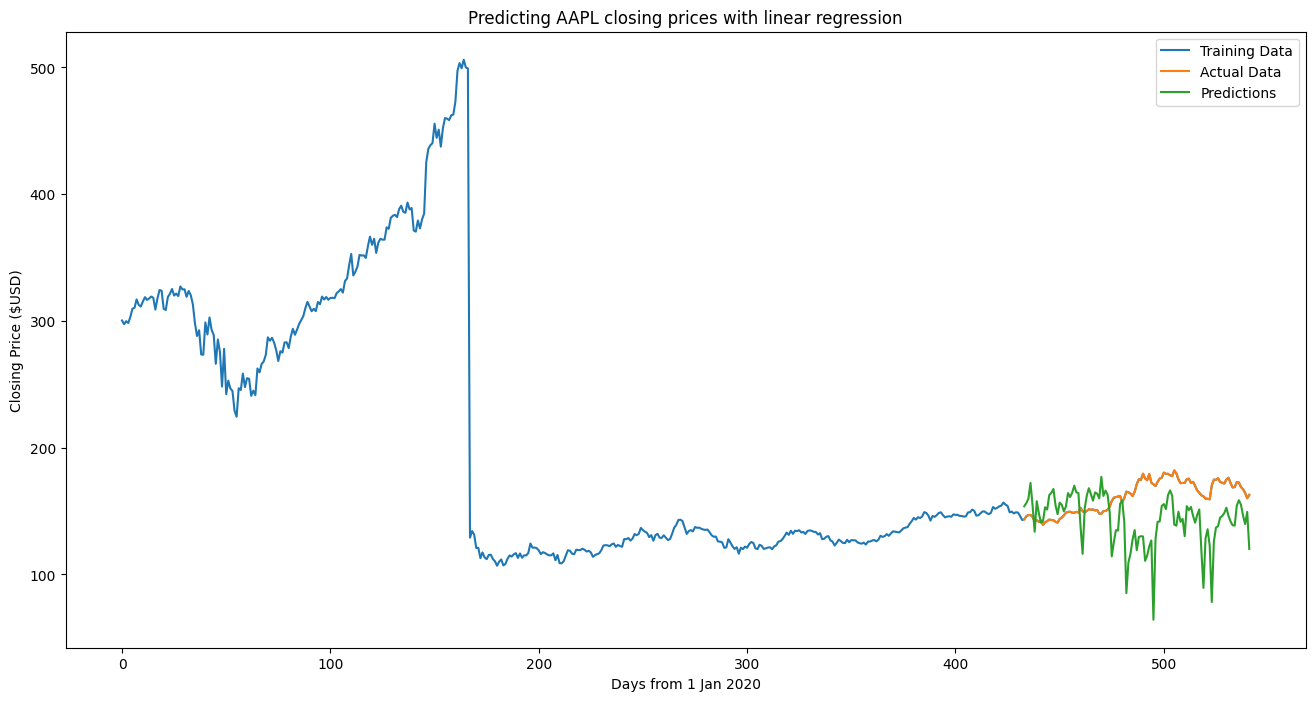

In [122]:
# visualising the predictive ability of the linear regression model on AAPL future closing prices
plt.figure(figsize=[16,8])

plt.plot(aapl_df['close'])

aapl_model_plot = aapl_df[433:].copy()
aapl_model_plot['predict'] = aapl_model.predict(aapl_model_plot.drop(columns = 'target'))
plt.plot(aapl_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AAPL closing prices with linear regression')

## Part 3: GOOG

In [4]:
# preparing the GOOG data set
goog = df.loc[df['symbol'] == "GOOG"]

goog_df = goog[['close','high','low','open','volume']]

goog_df['target'] = goog_df['close'].shift(-25)

goog_df.dropna(axis=0,inplace=True)

goog_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/404270789.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df['target'] = goog_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/404270789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goog_df.dropna(axis=0,inplace=True)


In [5]:
# defining the predictor (x) and outcome (y) variables
goog_x = goog_df.drop('target', axis=1).copy()
goog_y = goog_df['target'].copy()

# splitting the GOOG dataset into training and testing data sets
goog_x_train, goog_x_test, goog_y_train, goog_y_test  = train_test_split(goog_x, goog_y, test_size = 0.2)

# inspecting the number of rows and columns of the GOOG training and testing data sets
print("The shape of the training and testing data sets are as follows:\ngoog_x_train: {}\ngoog_x_test: {}\ngoog_y_train: {}\ngoog_y_test: {} \n".format(goog_x_train.shape, goog_x_test.shape, goog_y_train.shape, goog_y_test.shape))

print("There are {} rows and {} columns in the GOOG training data set.\nThere are {} rows and {} columns in the GOOG testing data set.".format(goog_y_train.shape[0], goog_x_train.shape[1], goog_y_test.shape[0], goog_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
goog_x_train: (433, 6)
goog_x_test: (109, 6)
goog_y_train: (433,)
goog_y_test: (109,) 

There are 433 rows and 6 columns in the GOOG training data set.
There are 109 rows and 6 columns in the GOOG testing data set.


In [6]:
# building the GOOG linear regression model
goog_model = LinearRegression()
goog_model.fit(goog_x_train, goog_y_train)

# predicting future GOOG closing prices based on the model
goog_model_prediction = goog_model.predict(goog_x_test)
goog_model_r2 = abs(goog_model.score(goog_x_test,goog_y_test)*100)
print('The r2 of the linear regression model is: ', goog_model_r2.round(2), '%')

The r2 of the linear regression model is:  94.58 %


Text(0.5, 1.0, 'Predicting GOOG closing prices with linear regression')

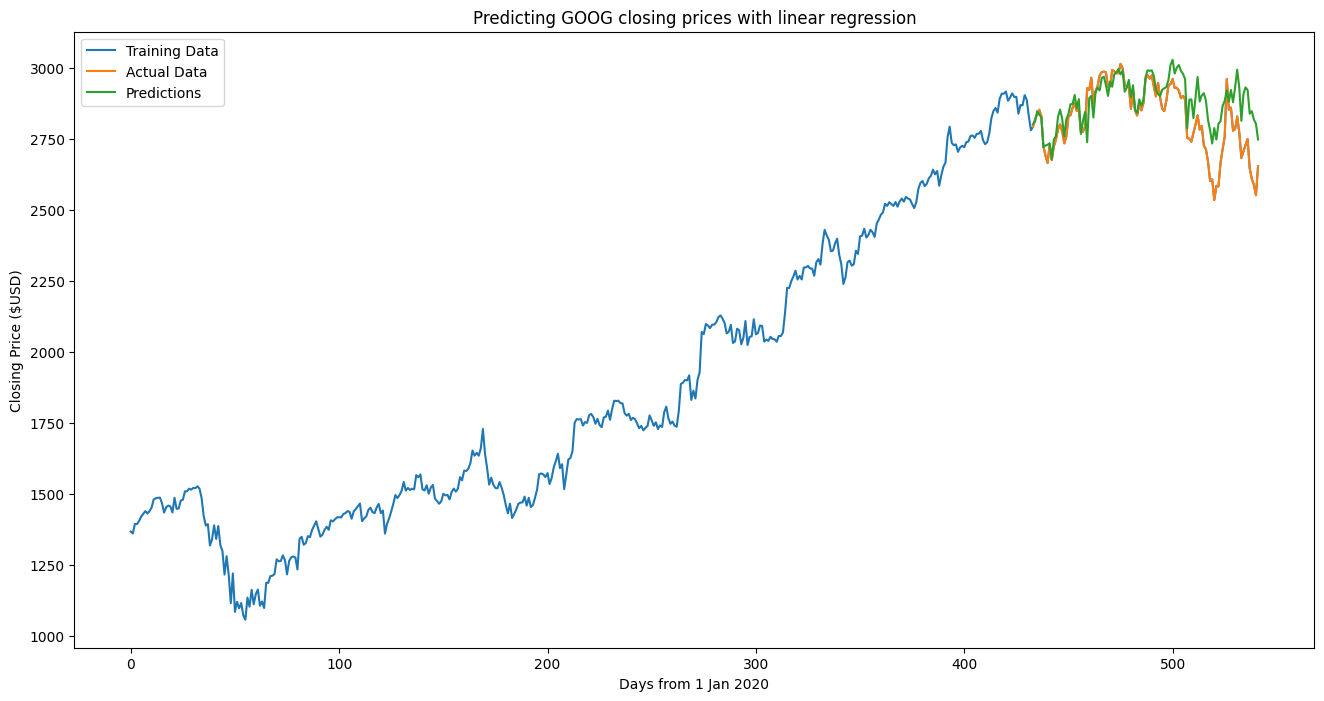

In [7]:
# visualising the predictive ability of the linear regression model on GOOG future closing prices
plt.figure(figsize=[16,8])

plt.plot(goog_df['close'])

goog_model_plot = goog_df[433:].copy()
goog_model_plot['predict'] = goog_model.predict(goog_model_plot.drop(columns = 'target'))
plt.plot(goog_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting GOOG closing prices with linear regression')

## Part 4: AMZN

In [8]:
# preparing the AMZN data set
amzn = df.loc[df['symbol'] == "AMZN"]

amzn_df = amzn[['close','high','low','open','volume']]

amzn_df['target'] = amzn_df['close'].shift(-25)

amzn_df.dropna(axis=0,inplace=True)

amzn_df.reset_index(inplace=True)

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1121689531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df['target'] = amzn_df['close'].shift(-25)
/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_11533/1121689531.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_df.dropna(axis=0,inplace=True)


In [9]:
# defining the predictor (x) and outcome (y) variables
amzn_x = amzn_df.drop('target', axis=1).copy()
amzn_y = amzn_df['target'].copy()

# splitting the AMZN dataset into training and testing data sets
amzn_x_train, amzn_x_test, amzn_y_train, amzn_y_test  = train_test_split(amzn_x, amzn_y, test_size = 0.2)

# inspecting the number of rows and columns of the AMZN training and testing data sets
print("The shape of the training and testing data sets are as follows:\namzn_x_train: {}\namzn_x_test: {}\namzn_y_train: {}\namzn_y_test: {} \n".format(amzn_x_train.shape, amzn_x_test.shape, amzn_y_train.shape, amzn_y_test.shape))

print("There are {} rows and {} columns in the AMZN training data set.\nThere are {} rows and {} columns in the AMZN testing data set.".format(amzn_y_train.shape[0], amzn_x_train.shape[1], amzn_y_test.shape[0], amzn_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
amzn_x_train: (433, 6)
amzn_x_test: (109, 6)
amzn_y_train: (433,)
amzn_y_test: (109,) 

There are 433 rows and 6 columns in the AMZN training data set.
There are 109 rows and 6 columns in the AMZN testing data set.


In [10]:
# building the AMZN linear regression model
amzn_model = LinearRegression()
amzn_model.fit(amzn_x_train, amzn_y_train)

# predicting future AMZN closing prices based on the model
amzn_model_prediction = amzn_model.predict(amzn_x_test)
amzn_model_r2 = abs(amzn_model.score(amzn_x_test,amzn_y_test)*100)
print('The r2 of the linear regression model is: ', amzn_model_r2.round(2), '%')

The r2 of the linear regression model is:  76.87 %


Text(0.5, 1.0, 'Predicting AMZN closing prices with linear regression')

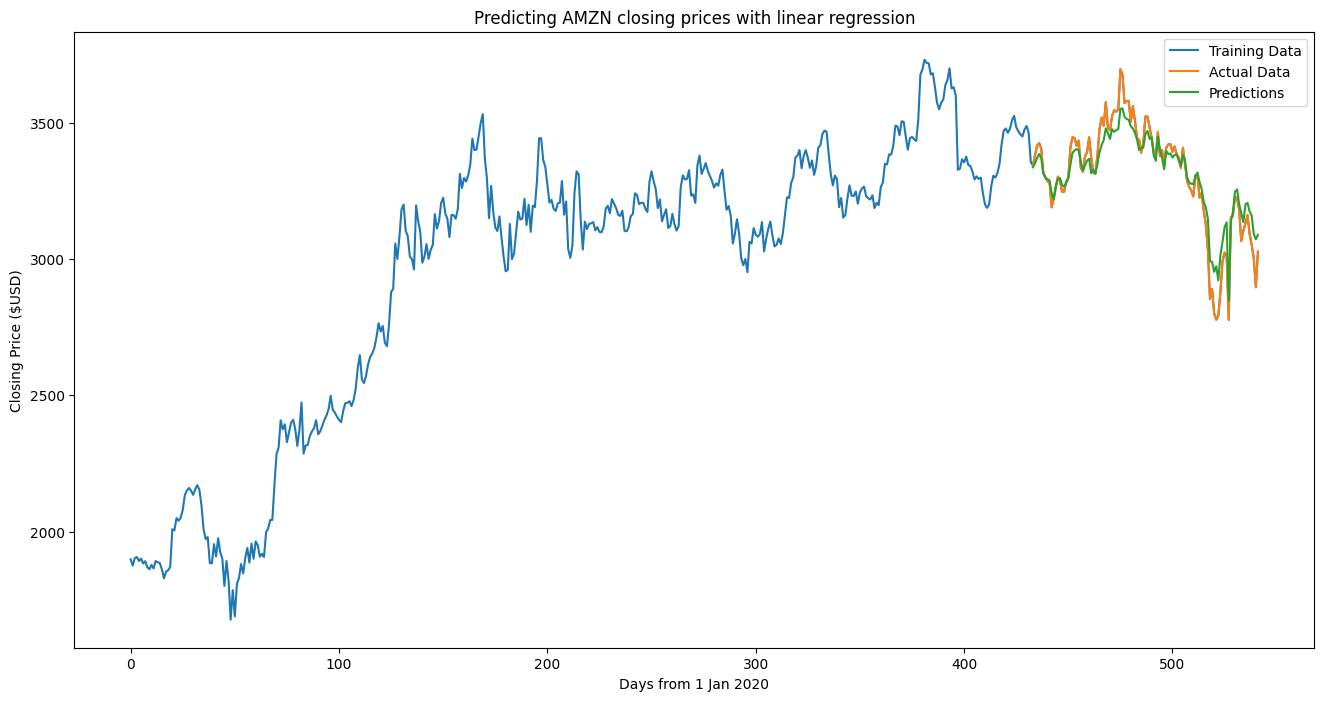

In [11]:
# visualising the predictive ability of the linear regression model on AMZN future closing prices
plt.figure(figsize=[16,8])

plt.plot(amzn_df['close'])

amzn_model_plot = amzn_df[433:].copy()
amzn_model_plot['predict'] = amzn_model.predict(amzn_model_plot.drop(columns = 'target'))
plt.plot(amzn_model_plot[['close', 'predict']])

plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting AMZN closing prices with linear regression')